In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install pyarrow

In [8]:
comments = pd.read_csv(r'/Users/sandeepkumar/Downloads/UScomments.csv', error_bad_lines=False)

/var/folders/zj/cdkmmqxs6hj3d6wdhyfs20r80000gn/T/ipykernel_46273/2094755728.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments = pd.read_csv(r'/Users/sandeepkumar/Downloads/UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

/var/folders/zj/cdkmmqxs6hj3d6wdhyfs20r80000gn/T/ipykernel_46273/2094755728.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv(r'/Users/sandeepkumar/Downloads/UScomments.csv', error_bad_lines=False)


In [9]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [10]:
comments.tail()

,video_id,comment_text,likes,replies
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0
691399,EoejGgUNmVU,Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...,0,0


In [12]:
comments.isnull().sum()   #find out missing values in your data

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [13]:
comments.dropna(inplace=True) # drop missing values as we have few and lets update dataframe as well

In [14]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [15]:
#Perform Sentiment Analysis -- analyzing sentiments of users.

In [16]:
!pip install textblob

In [18]:
from textblob import TextBlob

In [19]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [20]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [22]:
comments.shape

(691375, 4)

In [23]:
sample_df = comments[0:1000]

In [24]:
sample_df.shape

(1000, 4)

In [25]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
            


In [26]:
len(polarity)

691375

In [27]:
comments['polarity']=polarity

In [28]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [29]:
#word cloud analysis of data

In [30]:
filter1 = comments['polarity']==1

In [31]:
comments_positive = comments[filter1]

In [32]:
filter2 = comments['polarity']==-1

In [33]:
comments_negative = comments[filter2]

In [34]:
comments_positive.head(5)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [35]:
comments_negative.head(5)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [36]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [40]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [41]:
type(comments['comment_text'])

pandas.core.series.Series

In [42]:
#for wordcloud, we need to frame our 'comment_text' feature into string...

In [43]:
total_comments_positive=' '.join(comments_positive['comment_text'])

In [49]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

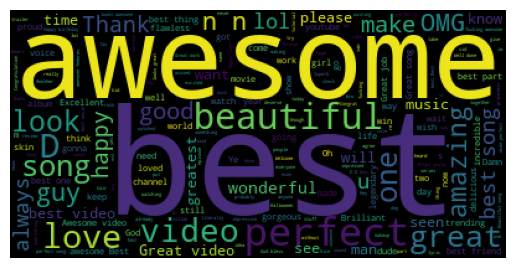

In [50]:
plt.imshow(wordcloud)
plt.axis('off')

In [51]:
total_comments_negative =' '.join(comments_negative['comment_text'])

In [53]:
wordcloud = WordCloud(stopwords = set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

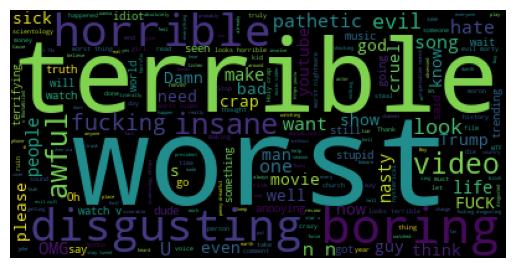

In [54]:
plt.imshow(wordcloud)
plt.axis('off')

In [55]:
#perform Emojis Analysis

In [56]:
!pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/98/00/00d56e704d69cee4a92b1d517676579b4af5f2f8bc72946c464a504705b2/emoji-2.10.1-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 1.5 MB/s eta 0:00:00a 0:00:01m


In [57]:
import emoji

In [58]:
emoji.__version__

'2.10.1'

In [59]:
comments['comment_text'].head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [63]:
comment = 'trending 😉'

In [84]:
[char for char in comment if char in emoji.EMOJI_DATA]   #by using list comprehension

['😉']

In [85]:
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [86]:
emoji_list

['😉']

In [109]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [116]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [119]:
from collections import Counter

In [120]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [124]:
Counter(all_emojis_list).most_common(10)[0]
                                    

('😂', 36987)

In [125]:
Counter(all_emojis_list).most_common(10)[0][0]

'😂'

In [126]:
Counter(all_emojis_list).most_common(10)[1][0]

'😍'

In [127]:
Counter(all_emojis_list).most_common(10)[2][0]

'❤'

In [128]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [133]:
Counter(all_emojis_list).most_common(10)[1][1]

                                           

33453

In [134]:
Counter(all_emojis_list).most_common(10)[0][1]

36987

In [135]:
Counter(all_emojis_list).most_common(10)[2][1]

31119

In [138]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [139]:
freqs


[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]